<a href="https://colab.research.google.com/github/lucca-fsc/MiningProject/blob/main/Projeto_Mineracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours','native_country','wages']
features = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours','native_country']


dados= pd.read_csv('adult.data', names = names, na_values = ' ?')


In [ ]:
dados.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country,wages
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dados.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours                0
native_country     583
wages                0
dtype: int64

In [ ]:
def UpdateMissingValues(dados, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        dados[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = dados['Density'].median()
        dados[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = dados[column].mean()
        dados[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = dados[column].mode()[0]
        dados[column].fillna(mode, inplace=True)


columns_missing_value = dados.columns[dados.isnull().any()]
print(columns_missing_value)
method = 'mode' # number or median or mean or mode
    
for c in columns_missing_value:
        UpdateMissingValues(dados, c)
    
dados.head()
dados.isnull().sum()

Index(['workclass', 'occupation', 'native_country'], dtype='object')


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours             0
native_country    0
wages             0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours           32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wages           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
classes = [dados['hours'].min(), 20, 40, 60, 80, dados['hours'].max()]

In [ ]:
labels = ['0 a 20 horas', '20 a 40 horas', '40 a 60 horas', '60 a 80 horas', '80 ou mais']

In [ ]:
frequencia = pd.value_counts(pd.cut(x = dados['hours'], 
       bins = classes,
       labels = labels,
       include_lowest = True))

frequencia

20 a 40 horas    20052
40 a 60 horas     8471
0 a 20 horas      2928
60 a 80 horas      902
80 ou mais         208
Name: hours, dtype: int64

In [ ]:
percentual = pd.value_counts(pd.cut(x = dados['hours'], 
       bins = classes,
       labels = labels,
       include_lowest = True),
       normalize = True)
percentual

20 a 40 horas    0.615829
40 a 60 horas    0.260158
0 a 20 horas     0.089924
60 a 80 horas    0.027702
80 ou mais       0.006388
Name: hours, dtype: float64

In [ ]:
tab_dist_freq = pd.DataFrame({'Frequencias': frequencia, 'Porcentagem (%)': percentual})
tab_dist_freq

,Frequencias,Porcentagem (%)
20 a 40 horas,20052,0.615829
40 a 60 horas,8471,0.260158
0 a 20 horas,2928,0.089924
60 a 80 horas,902,0.027702
80 ou mais,208,0.006388


In [ ]:
tab_dist_freq.sort_index(ascending= True, inplace = True)

In [ ]:
tab_dist_freq

,Frequencias,Porcentagem (%)
0 a 20 horas,2928,0.089924
20 a 40 horas,20052,0.615829
40 a 60 horas,8471,0.260158
60 a 80 horas,902,0.027702
80 ou mais,208,0.006388


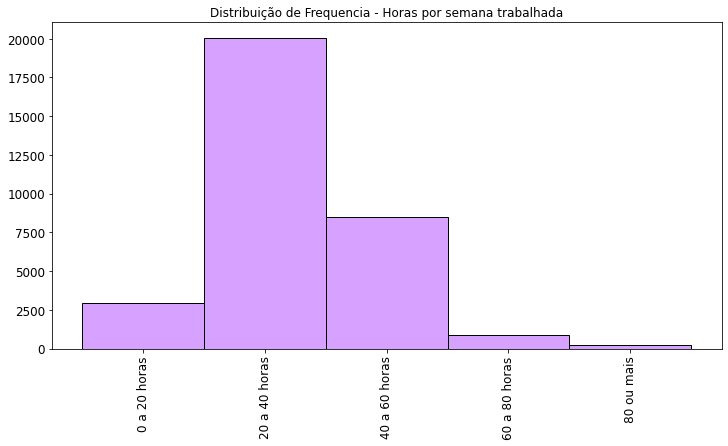

In [ ]:
tab_dist_freq['Frequencias'].plot.bar(width = 1, color = '#d6a1ff', figsize  = (12,6), edgecolor = 'black', title = 'Distribuição de Frequencia - Horas por semana trabalhada', fontsize = 12)

In [ ]:
valor_media_sexo_raca = pd.crosstab(dados['sex'], dados['race'], aggfunc = ['mean','std'], values = dados['hours'])
valor_media_sexo_raca

mean                                            \
race     Amer-Indian-Eskimo  Asian-Pac-Islander      Black      Other   
sex                                                                     
 Female           36.579832           37.439306  36.834084  35.926606   
 Male             42.197917           41.468975  39.997451  41.851852   

                                   std                                 \
race         White  Amer-Indian-Eskimo  Asian-Pac-Islander      Black   
sex                                                                     
 Female  36.296691           11.046509           12.479459   9.419960   
 Male    42.668822           11.596280           12.387563  10.909413   

                               
race         Other      White  
sex                            
 Female  10.300761  12.190951  
 Male    11.084779  12.194633

In [ ]:
media_hora_por_semana = dados['hours'].mean()

In [ ]:
media_hora_por_semana

40.437455852092995

In [ ]:
moda_hora_por_semana = dados['hours'].mode()[0]
moda_hora_por_semana

40

In [ ]:
mediana_hora_por_semana = dados['hours'].median()
mediana_hora_por_semana

40.0

In [ ]:
dados.groupby(['sex'])['hours'].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours, dtype: float64

In [ ]:
dados.groupby(['wages'])['hours'].mean()

wages
 <=50K    38.840210
 >50K     45.473026
Name: hours, dtype: float64

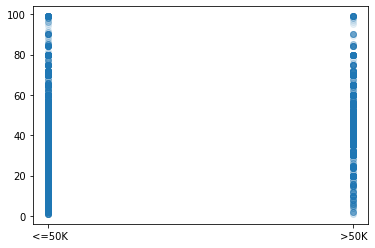

In [ ]:
y = dados['hours']
x = dados['wages']
plt.scatter(x,y, alpha = 0.09)

plt.show()


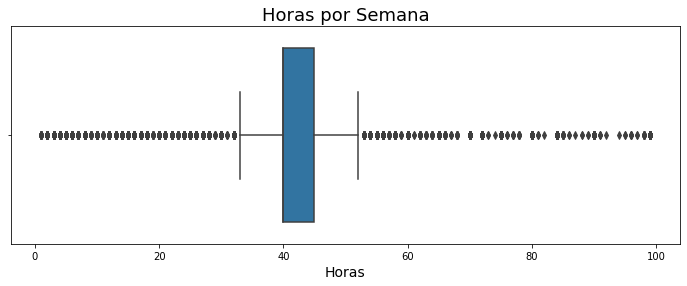

In [ ]:
ax = sns.boxplot( x = 'hours', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Horas por Semana', fontsize=18)
ax.set_xlabel('Horas', fontsize=14)
ax

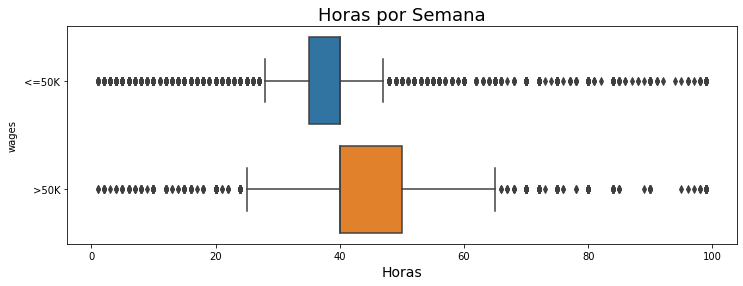

In [ ]:
ax = sns.boxplot( x = 'hours', y = 'wages', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Horas por Semana', fontsize=18)
ax.set_xlabel('Horas', fontsize=14)
ax

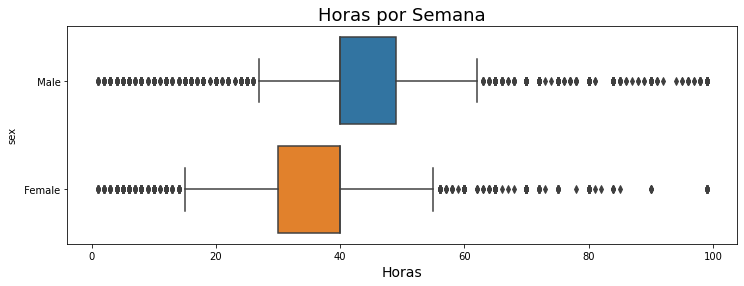

In [ ]:
ax = sns.boxplot( x = 'hours', y = 'sex', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Horas por Semana', fontsize=18)
ax.set_xlabel('Horas', fontsize=14)
ax

In [ ]:
# ax = sns.boxplot( x = 'hours', data = dados.query('20 < hours < 50'), orient = 'h')
# ax.figure.set_size_inches(12, 4)
# ax.set_title('Horas por Semana', fontsize=18)
# ax.set_xlabel('Horas', fontsize=14)
# ax

In [ ]:
dados_horas = dados[['hours']]
dados_horas.rename(columns = {'hours': 'Horas_por_Semana'},inplace = True)
dados_horas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Horas_por_Semana
0,40
1,13
2,40
3,40
4,40
...,...
32556,38
32557,40
32558,40
32559,20


In [ ]:
media_horas = dados_horas['Horas_por_Semana'].mean()
media_horas

40.437455852092995

In [ ]:
dados_horas['Desvio'] = dados_horas['Horas_por_Semana'] - media_horas
dados_horas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Horas_por_Semana,Desvio
0,40,-0.437456
1,13,-27.437456
2,40,-0.437456
3,40,-0.437456
4,40,-0.437456
...,...,...
32556,38,-2.437456
32557,40,-0.437456
32558,40,-0.437456
32559,20,-20.437456


In [ ]:
dados_horas['|Desvio|'] = dados_horas['Desvio'].abs()
dados_horas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Horas_por_Semana,Desvio,|Desvio|
0,40,-0.437456,0.437456
1,13,-27.437456,27.437456
2,40,-0.437456,0.437456
3,40,-0.437456,0.437456
4,40,-0.437456,0.437456
...,...,...,...
32556,38,-2.437456,2.437456
32557,40,-0.437456,0.437456
32558,40,-0.437456,0.437456
32559,20,-20.437456,20.437456


In [ ]:
desvio_medio_absoluto = dados_horas['Horas_por_Semana'].mad()
desvio_medio_absoluto

7.583227510276599

In [ ]:
dados_horas['(Desvio)^2'] = dados_horas['Desvio'].pow(2)
dados_horas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Horas_por_Semana,Desvio,|Desvio|,(Desvio)^2
0,40,-0.437456,0.437456,0.191368
1,13,-27.437456,27.437456,752.813984
2,40,-0.437456,0.437456,0.191368
3,40,-0.437456,0.437456,0.191368
4,40,-0.437456,0.437456,0.191368
...,...,...,...,...
32556,38,-2.437456,2.437456,5.941191
32557,40,-0.437456,0.437456,0.191368
32558,40,-0.437456,0.437456,0.191368
32559,20,-20.437456,20.437456,417.689602


In [ ]:
dados_horas['(Desvio)^2'].sum() / (len(dados_horas) - 1)

152.45899505045418

In [ ]:
variancia = dados_horas['Horas_por_Semana'].var()
variancia

152.45899505042865

In [ ]:
np.sqrt(variancia)

12.34742868173081

In [ ]:
desvio_padrao = dados_horas['Horas_por_Semana'].std()

In [ ]:
desvio_padrao

12.34742868173081

In [ ]:
dados.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                  13.640433
fnlwgt           105549.977697
education_num         2.572720
capital_gain       7385.292085
capital_loss        402.960219
hours                12.347429
dtype: float64

In [ ]:
tab_dist_freq.sort_index(ascending= True, inplace = True)

In [ ]:
tab_dist_freq.style.format({'Porcentagem (%)':'{:.2%}'})

,Frequencias,Porcentagem (%)
0 a 20 horas,2928,8.99%
20 a 40 horas,20052,61.58%
40 a 60 horas,8471,26.02%
60 a 80 horas,902,2.77%
80 ou mais,208,0.64%


In [ ]:
tab_dist_freq.style.format({'Porcentagem (%)':'{:.2%}'}).bar(subset = 'Porcentagem (%)', vmin = 0.0003, color = 'lightgreen')

,Frequencias,Porcentagem (%)
0 a 20 horas,2928,8.99%
20 a 40 horas,20052,61.58%
40 a 60 horas,8471,26.02%
60 a 80 horas,902,2.77%
80 ou mais,208,0.64%


In [ ]:
# tab_dist_freq.style.format({'Porcentagem (%)':'{:.2%}'}).bar(subset = 'Porcentagem (%)', vmin = 0.0003, color = 'lightgreen')\
# .applymap(lambda x: f"color: {'red' if x>= 10000 else 'blue'}",subset = 'Frequencias')\
# .applymap(lambda x: f"font-weight: {'bold' if x>= 2000 else 'normal'}",subset  ='Frequencias')

In [ ]:
tab_dist_freq.style.format({'Porcentagem (%)':'{:.2%}'}).bar(subset = 'Porcentagem (%)', vmin = 0.0003, color = 'lightgreen')\
.applymap(lambda x: f"color: {'red' if x>= 10000 else ''}",subset = 'Frequencias')\
.applymap(lambda x: f"color: {'blue' if x>= 2000 and x<10000 else ''}",subset = 'Frequencias')\
.applymap(lambda x: f"font-weight: {'bold' if x>= 2000 else 'normal'}",subset  ='Frequencias')\
.applymap(lambda x: f"color: {'#e80cad' if x>= 0.5 else ''}",subset ='Porcentagem (%)')\
.applymap(lambda x: f"font-weight: {'bold' if x>= 0.5 else 'normal'}",subset ='Porcentagem (%)')

,Frequencias,Porcentagem (%)
0 a 20 horas,2928,8.99%
20 a 40 horas,20052,61.58%
40 a 60 horas,8471,26.02%
60 a 80 horas,902,2.77%
80 ou mais,208,0.64%


In [ ]:
dados.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country,wages
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
select = dados['hours'] == 40

In [ ]:
dados[(dados['hours'] == 40) & (dados['race'] == ' Other')]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country,wages
50,25,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40,United-States,<=50K
233,33,Private,110978,Some-college,10,Divorced,Craft-repair,Other-relative,Other,Female,0,0,40,United-States,<=50K
356,65,Private,161400,11th,7,Widowed,Other-service,Unmarried,Other,Male,0,0,40,United-States,<=50K
404,28,Private,166481,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,2179,40,Puerto-Rico,<=50K
1344,26,Private,195105,HS-grad,9,Never-married,Sales,Not-in-family,Other,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,20,Private,369678,12th,8,Never-married,Prof-specialty,Not-in-family,Other,Male,0,1602,40,United-States,<=50K
31831,43,Local-gov,34640,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Other,Male,0,1887,40,United-States,>50K
32075,27,Private,147638,Masters,14,Never-married,Prof-specialty,Not-in-family,Other,Female,0,0,40,Japan,<=50K
32232,30,Private,215441,Some-college,10,Never-married,Adm-clerical,Not-in-family,Other,Male,0,0,40,United-States,<=50K


In [ ]:
dados['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
#identify all categorical variables
cat_columns = dados.select_dtypes(['object']).columns

#convert all categorical variables to numeric
dados[cat_columns] = dados[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler

In [ ]:
target = 'wages'

In [ ]:
x = dados.loc[:, features].values
# Separating out the target
y = dados.loc[:,[target]].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(2)
projected = pca.fit_transform(x)

In [ ]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

65686.75576225703
For n_clusters = 10, Silhoutte score is 0.38880312967579833


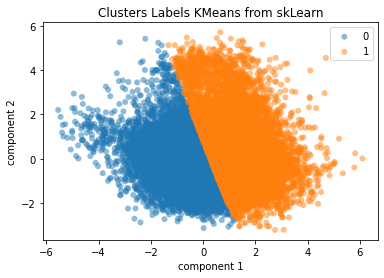

In [ ]:
kmeans = KMeans(n_clusters = 2).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)

print("For n_clusters = {}, Silhoutte score is {}".format(10, score))



plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from skLearn')

plt.show()

[0.37718262 0.62281738]
[[ 1.10770009  0.66750141]
 [-0.67083101 -0.40424358]]


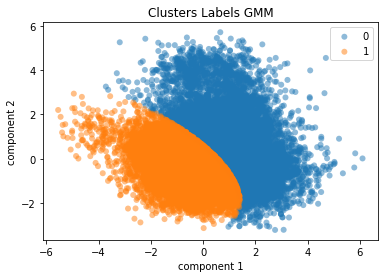

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 2).fit(projected)

print(gm.weights_)
print(gm.means_)

x = gm.predict(projected)

plot_samples(projected, x, 'Clusters Labels GMM')

plt.show()

## Implementação dos algoritmos de Classificação (KNN, SVC e Decision Tree)

### Implementação KNN

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [ ]:
X = dados.drop(['fnlwgt','wages'], axis = 1)
y = dados['wages']

In [ ]:
print('Total samples: {}'.format(X.shape[0]))

Total samples: 32561


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print('Total train samples: {}'.format(X_train.shape[0]))
print('Total test samples: {}'.format(X_test.shape[0]))

Total train samples: 24420
Total test samples: 8141


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 83.06%
F1 Score K-NN from sk-learn: 75.48%


In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[5644,  659],
       [ 720, 1118]])

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6303
           1       0.63      0.61      0.62      1838

    accuracy                           0.83      8141
   macro avg       0.76      0.75      0.75      8141
weighted avg       0.83      0.83      0.83      8141



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


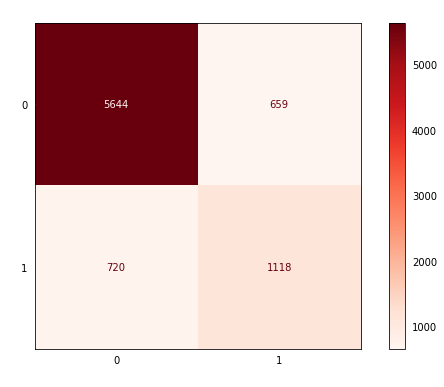

In [ ]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Implementação SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)
print(svm.support_vectors_)
print(svm.support_)

print('Qtd Support Vectors: ')
print(svm.n_support_)

y_predicted = svm.predict(X_test)


[[-0.63028916 -1.2022512   1.91284522 ... -0.21889171 -0.03601924
  -0.2363472 ]
 [-0.5569924   3.14159557  0.45920143 ... -0.21889171  0.36872488
  -0.2363472 ]
 [ 0.83564617 -0.11628951  0.45920143 ... -0.21889171 -0.03601924
  -0.2363472 ]
 ...
 [ 0.24927204 -0.11628951  1.04065895 ... -0.21889171 -0.03601924
  -0.2363472 ]
 [ 0.83564617 -0.11628951  0.45920143 ... -0.21889171 -0.03601924
  -0.2363472 ]
 [-0.5569924  -0.11628951  1.04065895 ... -0.21889171 -0.8455075
  -0.2363472 ]]
[    2     5    11 ... 24397 24402 24408]
Qtd Support Vectors: 
[4854 4736]


In [ ]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100
print('Accuracy SVM from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score SVM from Sk-learn: {:.2f}%'.format(f1))

Accuracy SVM from Sk-learn: 83.43%
F1 Score SVM from Sk-learn: 71.08%


In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6056,  247],
       [1102,  736]])

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6303
           1       0.75      0.40      0.52      1838

    accuracy                           0.83      8141
   macro avg       0.80      0.68      0.71      8141
weighted avg       0.82      0.83      0.81      8141



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


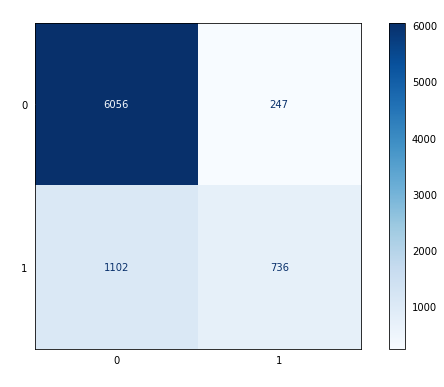

In [ ]:
matrix = plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Implementação Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

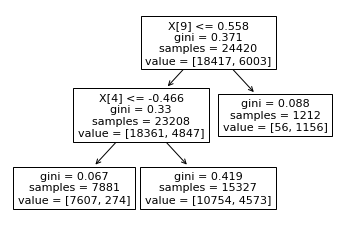

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [ ]:
y_predicted = clf.predict(X_test)
print(y_predicted)

[0 0 1 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy Decision Tree from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score Decision Tree from Sk-learn: {:.2f}%'.format(f1))

Accuracy Decision Tree from Sk-learn: 81.03%
F1 Score Decision Tree from Sk-learn: 59.18%


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      6303
           1       0.92      0.17      0.29      1838

    accuracy                           0.81      8141
   macro avg       0.87      0.58      0.59      8141
weighted avg       0.83      0.81      0.76      8141



In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6277,   26],
       [1518,  320]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


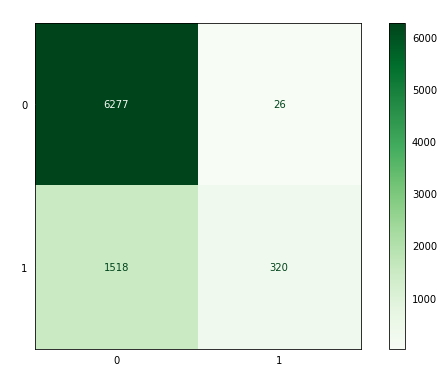

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Teste Outro Modelo sem utilizar Capital_gain e Capital_Loss

In [ ]:
X_teste_1 = dados.drop(['fnlwgt','wages', 'capital_gain','capital_loss','education_num'], axis = 1)
y_teste_1 = dados['wages']

In [ ]:
X_teste_1

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours,native_country
0,39,0,0,0,0,0,0,0,40,0
1,50,1,0,1,1,1,0,0,13,0
2,38,2,1,2,2,0,0,0,40,0
3,53,2,2,1,2,1,1,0,40,0
4,28,2,0,1,3,2,1,1,40,1
...,...,...,...,...,...,...,...,...,...,...
32556,27,2,6,1,10,2,0,1,38,0
32557,40,2,1,1,9,1,0,0,40,0
32558,58,2,1,6,0,4,0,1,40,0
32559,22,2,1,0,0,3,0,0,20,0


In [ ]:
print('Total samples: {}'.format(X_teste_1.shape[0]))

Total samples: 32561


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_teste_1, y_teste_1, test_size = 0.25, random_state = 1)
print('Total train samples: {}'.format(X_train_1.shape[0]))
print('Total test samples: {}'.format(X_test_1.shape[0]))

Total train samples: 24420
Total test samples: 8141


In [ ]:
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.fit_transform(X_test_1)

In [ ]:
svm_1 = SVC(kernel = 'poly')
svm_1.fit(X_train_1, y_train_1)
print(svm_1.support_vectors_)
print(svm_1.support_)

print('Qtd Support Vectors: ')
print(svm_1.n_support_)

y_predicted_1 = svm_1.predict(X_test_1)

[[-0.63028916 -1.2022512   1.91284522 ... -0.70294117 -0.03601924
  -0.2363472 ]
 [-0.5569924   3.14159557  0.45920143 ... -0.70294117  0.36872488
  -0.2363472 ]
 [ 0.10267851 -0.11628951 -0.7037136  ... -0.70294117 -0.03601924
  -0.2363472 ]
 ...
 [-0.5569924  -0.11628951  1.04065895 ... -0.70294117 -0.8455075
  -0.2363472 ]
 [-0.48369563 -0.11628951 -0.99444236 ... -0.70294117  0.36872488
  -0.2363472 ]
 [-0.41039886 -0.11628951 -0.99444236 ... -0.70294117  0.36872488
  -0.2363472 ]]
[    2     5    17 ... 24408 24416 24419]
Qtd Support Vectors: 
[5920 5799]


In [ ]:
accuracy = accuracy_score(y_test_1, y_predicted_1) * 100
f1 = f1_score(y_test_1, y_predicted_1, average = 'macro') * 100
print('Accuracy SVM from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score SVM from Sk-learn: {:.2f}%'.format(f1))

Accuracy SVM from Sk-learn: 78.93%
F1 Score SVM from Sk-learn: 55.56%


In [ ]:
cm = confusion_matrix(y_test_1, y_predicted_1)
cm

array([[6165,  138],
       [1577,  261]])

In [ ]:
y_predicted_1

array([0, 0, 0, ..., 0, 0, 0])

### Teste Simulador interativo

In [ ]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
age = widgets.Text(description="Age")
workclass = widgets.Text(description="Workclass")
education = widgets.Text(description="education")
#education_num = widgets.Text(description="education_num")
marital_status = widgets.Text(description="marital_status")
occupation = widgets.Text(description="occupation")
relationship = widgets.Text(description="relationship")
race = widgets.Text(description="race")
sex = widgets.Text(description="sex")
#capital_gain = widgets.Text(description="capital_gain")
#capital_loss = widgets.Text(description="capital_loss")
hours = widgets.Text(description="hours")
native_country = widgets.Text(description="native_country")


botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([age, workclass, education, marital_status, occupation])
right = VBox([relationship,race, sex, hours, native_country])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(age.value if age.value else 0), 
                float(workclass.value if workclass.value else 0), 
                float(education.value if education.value else 0), 
                #float(education_num.value if education_num.value else 0), 
                float(marital_status.value if marital_status.value else 0), 
                float(occupation.value if occupation.value else 0),
                float(relationship.value if relationship.value else 0),
                float(race.value if race.value else 0),
                float(sex.value if sex.value else 0),
                #float(capital_gain.value if capital_gain.value else 0),
                #float(capital_loss.value if capital_loss.value else 0),
                float(hours.value if hours.value else 0),
                float(native_country.value if native_country.value else 0)
             ]]
    print('0 -> Menos de 50K por ano // 1 -> Mais de 50K por ano ---------- reposta: {0:.2f}'.format(svm_1.predict(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [ ]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())

In [ ]:
dados.query('wages == 1')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country,wages
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1
10,37,2,280464,5,10,1,1,1,1,0,0,0,80,0,1
11,30,0,141297,0,13,1,3,1,2,0,0,0,40,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,2,287372,9,16,1,3,1,0,0,0,0,10,0,1
32545,39,4,111499,6,12,1,0,2,0,1,0,0,20,0,1
32554,53,2,321865,3,14,1,1,1,0,0,0,0,40,0,1
32557,40,2,154374,1,9,1,9,1,0,0,0,0,40,0,1
